In [1]:
from mlwp import *
%matplotlib inline

In [2]:
diabetes = datasets.load_diabetes()
tts = skms.train_test_split(diabetes.data,diabetes.target,test_size=.25)
(diabetes_train_ftrs, diabetes_test_ftrs,diabetes_train_tgt,diabetes_test_tgt) = tts

In [4]:
diabetes_df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0000
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0000
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,141.0000
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,206.0000
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,135.0000


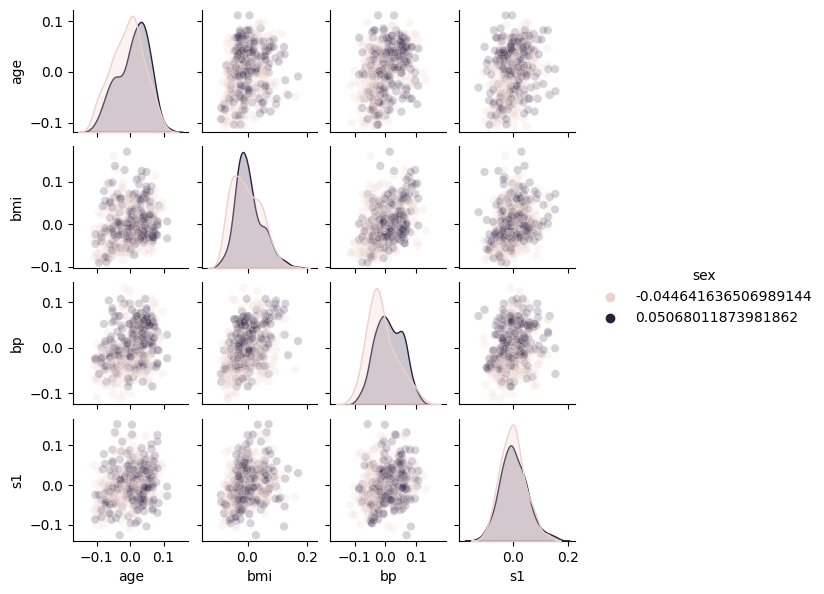

In [5]:
sns.pairplot(diabetes_df[['age', 'sex', 'bmi', 'bp', 's1']],
size=1.5, hue='sex', plot_kws={'alpha':.2});

In [6]:
values = np.array([1, 3, 5, 8, 11, 13, 15])
print("no outlier")
print(np.mean(values),np.median(values))
values_with_outlier = np.array([1, 3, 5, 8, 11, 13, 40])
print("with outlier")
print("%5.2f" % np.mean(values_with_outlier),
np.median(values_with_outlier))

no outlier
8.0 8.0
with outlier
11.57 8.0


In [10]:
distances = np.array([2.0, 4.0, 4.0])
closeness = 1.0 / distances# element-by-element division
print(closeness)
weights = closeness / np.sum(closeness)# normalize sum to one
weights

[0.5  0.25 0.25]


array([0.5 , 0.25, 0.25])

In [8]:
values = np.array([4, 6, 8])
mean = np.mean(values)
wgt_mean = np.dot(values, weights)
print("Mean:", mean)
print("Weighted Mean:", wgt_mean)

Mean: 6.0
Weighted Mean: 5.5


In [12]:
knn= neighbors.KNeighborsRegressor(n_neighbors=3)
fit= knn.fit(diabetes_train_ftrs, diabetes_train_tgt)
preds = fit.predict(diabetes_test_ftrs)
# evaluate our predictions against the held-back testing targets
metrics.mean_squared_error(diabetes_test_tgt, preds)

3471.41941941942

                        LINEAR REGRESSION

In [13]:
def axis_helper(ax, lims):
    'clean up axes'
    ax.set_xlim(lims); ax.set_xticks([])
    ax.set_ylim(lims); ax.set_yticks([])
    ax.set_aspect('equal')

In [15]:
# our data is very simple:two (x, y) points
D = np.array([[3, 5],
    [4, 2]])
# we'll take x as our "input" and y as our "output"
x, y = D[:, 0], D[:, 1]

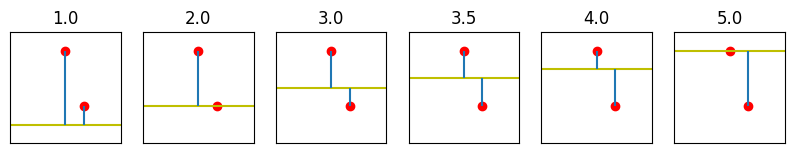

In [16]:
horizontal_lines = np.array([1, 2, 3, 3.5, 4, 5])
results = []
fig, axes = plt.subplots(1, 6, figsize=(10, 5))
for h_line, ax in zip(horizontal_lines, axes.flat):
    # styling
    axis_helper(ax, (0, 6))
    ax.set_title(str(h_line))
    # plot the data
    ax.plot(x, y, 'ro')
    # plot the prediction line
    ax.axhline(h_line, color='y') # ax coords; defaults to 100%
    # plot the errors
    # the horizontal line *is* our prediction; renaming for clarity
    predictions = h_line
    ax.vlines(x, predictions, y)
    # calculate the error amounts and their sum of squares
    errors = y - predictions
    sse = np.dot(errors, errors)
    # put together some results in a tuple
    results.append((predictions,
    errors, errors.sum(),
    sse, np.sqrt(sse)))

In [17]:
col_labels = "Prediction", "Errors", "Sum", "SSE", "Distance"
display(pd.DataFrame.from_records(results,
                        columns=col_labels,
                        index="Prediction"))

,Errors,Sum,SSE,Distance
Prediction,,,,
1.0000,"[4.0, 1.0]",5.0000,17.0000,4.1231
2.0000,"[3.0, 0.0]",3.0000,9.0000,3.0000
3.0000,"[2.0, -1.0]",1.0000,5.0000,2.2361
3.5000,"[1.5, -1.5]",0.0000,4.5000,2.1213
4.0000,"[1.0, -2.0]",-1.0000,5.0000,2.2361
5.0000,"[0.0, -3.0]",-3.0000,9.0000,3.0000


In [18]:
def process(D, model, ax):
    # make some useful abbreviations/names
    # y is our "actual"
    x, y = D[:, 0], D[:, 1]
    m, b = model
    # styling
    axis_helper(ax, (0, 8))
    # plot the data
    ax.plot(x, y, 'ro')
    # plot the prediction line
    helper_xs = np.array([0, 8])
    helper_line = m * helper_xs + b
    ax.plot(helper_xs, helper_line, color='y')
    # plot the errors
    predictions = m * x + b
    ax.vlines(x, predictions, y)
    # calculate error amounts
    errors = y - predictions
    # tuple up the results
    sse = np.dot(errors, errors)
    return (errors, errors.sum(), sse, np.sqrt(sse))

,Raw Errors,Sum,SSE,TotDist
0,"[2, -2]",0,8,2.8284
1,"[1, -3]",-2,10,3.1623
2,"[0, -4]",-4,16,4.0000
3,"[0, -2]",-2,4,2.0000
4,"[0, 0]",0,0,0.0000


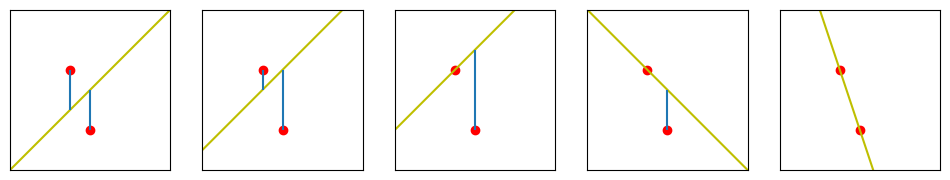

In [20]:
# our data is very simple:two (x, y) points
D = np.array([[3, 5],[4, 2]])
#m b--> predictions = mx + b
lines_mb = np.array([[ 1,0],
                    [ 1,1],
                    [ 1,2],
                    [-1,8],
                    [-3, 14]])
col_labels = ("Raw Errors", "Sum", "SSE", "TotDist")
results = []
# note: plotting occurs in process()
fig, axes = plt.subplots(1, 5, figsize=(12, 6))
records = [process(D, mod, ax) for mod,ax in zip(lines_mb, axes.flat)]
df = pd.DataFrame.from_records(records, columns=col_labels)
display(df)

In [3]:
# stand-alone code
from sklearn import (datasets, neighbors,model_selection as skms,linear_model, metrics)
diabetes = datasets.load_diabetes()
tts = skms.train_test_split(diabetes.data,
                            diabetes.target,test_size=.25)
(diabetes_train, diabetes_test,diabetes_train_tgt, diabetes_test_tgt) = tts
models = {'kNN': neighbors.KNeighborsRegressor(n_neighbors=5),
            'linreg' : linear_model.LinearRegression()}
for     name, model in models.items():
    fit = model.fit(diabetes_train, diabetes_train_tgt)
    preds = fit.predict(diabetes_test)
    score = np.sqrt(metrics.mean_squared_error(diabetes_test_tgt, preds))
    print("{:>6s} : {:0.2f}".format(name,score))

   kNN : 53.22
linreg : 49.28
